In [1]:
import requests as rq
import re
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
strona=rq.get('https://www.xtb.com/pl/aktualno%C5%9Bci?page=1').text

In [3]:
for i in range(1,100):
    strona=rq.get('https://www.xtb.com/pl/aktualno%C5%9Bci?page='+__builtins__.str(i)).text
    if (i<64):
        match=re.search('VOLX.*? dla pozycji .*?\d+',strona,re.MULTILINE)
    else:
        match=re.search('VOLX.*? swap points .*?\d+',strona,re.MULTILINE)
    if(match):
        print('https://www.xtb.com/pl/aktualno%C5%9Bci?page='+__builtins__.str(i))
        print(match.group(0))



https://www.xtb.com/pl/aktualno%C5%9Bci?page=1
VOLX+, VOLX.., VOLX., VOLX -146 pkt swapowych dla pozycji długiej; 146
https://www.xtb.com/pl/aktualno%C5%9Bci?page=5
VOLX+, VOLX.., VOLX., VOLX -150 pkt swapowych dla pozycji długiej; 150
https://www.xtb.com/pl/aktualno%C5%9Bci?page=11
VOLX+, VOLX.., VOLX., VOLX -135 pkt swapowych dla pozycji długiej; 135
https://www.xtb.com/pl/aktualno%C5%9Bci?page=15
VOLX+, VOLX.., VOLX., VOLX -39 pkt swapowych dla pozycji długiej; 39
https://www.xtb.com/pl/aktualno%C5%9Bci?page=19
VOLX+, VOLX.., VOLX., VOLX -84 pkt swapowych dla pozycji długiej; 84
https://www.xtb.com/pl/aktualno%C5%9Bci?page=23
VOLX+, VOLX.., VOLX., VOLX -110 pkt swapowych dla pozycji długiej; 110
https://www.xtb.com/pl/aktualno%C5%9Bci?page=27
VOLX+, VOLX.., VOLX., VOLX 4 pkt swapowych dla pozycji długiej; -4
https://www.xtb.com/pl/aktualno%C5%9Bci?page=32
VOLX+, VOLX.., VOLX., VOLX -180 pkt swapowych dla pozycji długiej; 180
https://www.xtb.com/pl/aktualno%C5%9Bci?page=36
VOLX, VOLX

In [4]:
swaps=pd.DataFrame(columns=["data",'swap_points_for_short'])
swaps['swap_points_for_short']=[146,150,135,39,84,110,-4,180,127,178,205,61,113,252,249,198,35,235,180,100,6,-55,-25,70,47,-110,89]
swaps['data']=['20171012','20170912','20170809','20170706','20170607','20170508','20170406',
              '20170307','20170202','20170105','20161208','20161108',
               '20161011','20160908','20160810','20160713','20160614','20160511','20160406','20160302','20160203'
              ,'20160107','20151210','20151110','20151008','20150909','20150807']
swaps['Date']=swaps['data'].apply(lambda x: dt.strptime(x,'%Y%m%d'))
swaps.drop('data',axis=1)


,swap_points_for_short,Date
0,146,2017-10-12
1,150,2017-09-12
2,135,2017-08-09
3,39,2017-07-06
4,84,2017-06-07
5,110,2017-05-08
6,-4,2017-04-06
7,180,2017-03-07
8,127,2017-02-02
9,178,2017-01-05


In [5]:
#swaps[(swaps['Date']>dt.strptime('20160830','%Y%m%d')) & (swaps['Date']<dt.strptime('20170130','%Y%m%d'))]['swap_points_for_short'].sum()
def sumswaps(begin,end):
    try:
        t1=dt.strptime(begin,'%Y%m%d')
    except ValueError:
        print('Incorrect begin date')
        return -1000000;
    try:
        t2=dt.strptime(end,'%Y%m%d')
    except ValueError:
        print('Incorrect end date')
        return -1000000;        
    return swaps[(swaps['Date']>t1) & (swaps['Date']<t2)]['swap_points_for_short'].sum()



print(sumswaps('20160830','20170330'))


1116


In [6]:
vixdata=pd.read_csv('http://www.cboe.com/publish/scheduledtask/mktdata/datahouse/vixcurrent.csv',skiprows=1)
vixdata['Date']=vixdata['Date'].apply(lambda x:dt.strptime(x,'%m/%d/%Y'))
vixdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 5 columns):
Date         3471 non-null datetime64[ns]
VIX Open     3471 non-null float64
VIX High     3471 non-null float64
VIX Low      3471 non-null float64
VIX Close    3471 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 135.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020749818A90>]], dtype=object)

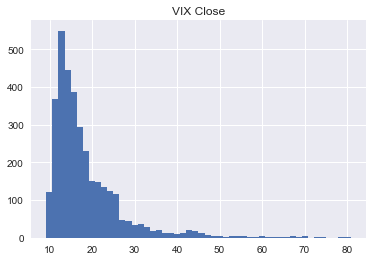

In [7]:
vixdata.hist(column='VIX Close',bins=50)

In [8]:
print('mean:',vixdata['VIX Close'].mean())
print('std dev:',vixdata['VIX Close'].std())
print('std dev:',vixdata['VIX Close'].max())

      

mean: 18.657173725151228
std dev: 9.0136210882342
std dev: 80.86


In [9]:
lbegin=dt.strptime('20160830','%Y%m%d')

print(vixdata[vixdata['Date']==lbegin])

           Date  VIX Open  VIX High  VIX Low  VIX Close
3187 2016-08-30     12.94      13.6     12.7      13.12


In [10]:
def priceindayrange(day,price):
    try:
        lday=dt.strptime(day,'%Y%m%d')
    except ValueError:
        print('Incorrect date')
        return -1000000
    lmax=float(vixdata[vixdata['Date']==lday]['VIX High'])
    lmin=float(vixdata[vixdata['Date']==lday]['VIX Low'])
    if (price>=lmin) & (price<=lmax):
        return True
    return False

print(priceindayrange('20160830',16))

False


In [11]:
def trade_result(begin,end,direction='short',openprice=None,closeprice=None):
    result=0
    try:
        lbegin=dt.strptime(begin,'%Y%m%d')
    except ValueError:
        print('Incorrect begin date')
        return -1000000
    try:
        lend=dt.strptime(end,'%Y%m%d')       
    except ValueError:
        print('Incorrect end date')
        return -1000000
    if not openprice:
        lopenprice=float(vixdata[vixdata['Date']==lbegin]['VIX Close'])
    elif priceindayrange(begin,openprice):
        lopenprice=openprice
    else:
        print ('Open price not in day renge')
        return -1000000
    if not closeprice:
        lcloseprice=float(vixdata[vixdata['Date']==lend]['VIX Close'])
    elif priceindayrange(end,closeprice):
        lcloseprice=closeprice  
    else:
        print ('Clse price not in day renge')
        return -1000000        
    if direction=='short':
        result=lopenprice-lcloseprice+sumswaps(begin,end)
    else:
        result=-lopenprice+lcloseprice-sumswaps(begin,end)
    return result

trade_result(begin='20160830',end='20170330')

1117.58

In [12]:
for i in range(1,70):
    strona=rq.get('https://www.xtb.com/pl/aktualno%C5%9Bci?page='+__builtins__.str(i)).text
    lista=strona.split('VOLX..')
    if(len(lista)>1):
        for j in range(0,len(lista)):
            lan1=lista[j].find('swapowych dla pozycji')
            if (lan1>0):
                            print('https://www.xtb.com/pl/aktualno%C5%9Bci?page='+__builtins__.str(i))
                            print (lista[j][:110])

    


https://www.xtb.com/pl/aktualno%C5%9Bci?page=1
, VOLX., VOLX -146 pkt swapowych dla pozycji długiej; 146 pkt swapowych dla pozycji kr&oacute;tkiej</p>

<p>
https://www.xtb.com/pl/aktualno%C5%9Bci?page=1
 powinien być wyższy.</p>

<p>Dokładna wielkość bazy znana będzie w momencie zamknięcia handlu i zostanie po
https://www.xtb.com/pl/aktualno%C5%9Bci?page=2
</p>

<p>Z powodu świąt narodowych, handel na następujących instrumentach będzie odwołany:</p>

<p><br />
https://www.xtb.com/pl/aktualno%C5%9Bci?page=5
<!DOCTYPE html>
<html lang="pl" >

    <head xmlns="http://www.w3.org/1999/xhtml" prefix="og: http://ogp.me/ns
https://www.xtb.com/pl/aktualno%C5%9Bci?page=5
. Dlatego też klienci posiadający otwarte pozycje zostaną w zależności od zajmowanej pozycji, uznani bądź obci
https://www.xtb.com/pl/aktualno%C5%9Bci?page=5
, VOLX., VOLX -150 pkt swapowych dla pozycji długiej; 150 pkt swapowych dla pozycji kr&oacute;tkiej&nbsp;</p>
https://www.xtb.com/pl/aktualno%C5%9Bci?page=6
, VOLX+<br />
Ś

https://www.xtb.com/pl/aktualno%C5%9Bci?page=55
, VOLX+. Dlatego też klienci posiadający otwarte pozycje zostali w zależności od zajmowanej pozycji, uznani bą
https://www.xtb.com/pl/aktualno%C5%9Bci?page=55
, VOLX+ -249 pkt swapowych dla pozycji długiej; 249 pkt swapowych dla pozycji kr&oacute;tkiej</p>

<p>XTB</p
https://www.xtb.com/pl/aktualno%C5%9Bci?page=55
, VOLX+. Dlatego też klienci posiadający otwarte pozycje zostaną w zależności od zajmowanej pozycji, uznani bą
https://www.xtb.com/pl/aktualno%C5%9Bci?page=55
, VOLX+ -249 pkt swapowych dla pozycji długiej; 249 pkt swapowych dla pozycji kr&oacute;tkiej</p>

<p>XTB</p
https://www.xtb.com/pl/aktualno%C5%9Bci?page=57
<!DOCTYPE html>
<html lang="pl" >

    <head xmlns="http://www.w3.org/1999/xhtml" prefix="og: http://ogp.me/ns
https://www.xtb.com/pl/aktualno%C5%9Bci?page=57
, VOLX+ -198 pkt swapowych dla pozycji długiej; 198 pkt swapowych dla pozycji kr&oacute;tkiej</p>

<p>- OIL.
https://www.xtb.com/pl/aktualno%C5%9Bci?page=58
, SO

In [13]:
lista[3]

IndexError: list index out of range

In [15]:
for i in range(1,70):
    print('https://www.xtb.com/pl/aktualno%C5%9Bci?page='+__builtins__.str(i))

https://www.xtb.com/pl/aktualno%C5%9Bci?page=1
https://www.xtb.com/pl/aktualno%C5%9Bci?page=2
https://www.xtb.com/pl/aktualno%C5%9Bci?page=3
https://www.xtb.com/pl/aktualno%C5%9Bci?page=4
https://www.xtb.com/pl/aktualno%C5%9Bci?page=5
https://www.xtb.com/pl/aktualno%C5%9Bci?page=6
https://www.xtb.com/pl/aktualno%C5%9Bci?page=7
https://www.xtb.com/pl/aktualno%C5%9Bci?page=8
https://www.xtb.com/pl/aktualno%C5%9Bci?page=9
https://www.xtb.com/pl/aktualno%C5%9Bci?page=10
https://www.xtb.com/pl/aktualno%C5%9Bci?page=11
https://www.xtb.com/pl/aktualno%C5%9Bci?page=12
https://www.xtb.com/pl/aktualno%C5%9Bci?page=13
https://www.xtb.com/pl/aktualno%C5%9Bci?page=14
https://www.xtb.com/pl/aktualno%C5%9Bci?page=15
https://www.xtb.com/pl/aktualno%C5%9Bci?page=16
https://www.xtb.com/pl/aktualno%C5%9Bci?page=17
https://www.xtb.com/pl/aktualno%C5%9Bci?page=18
https://www.xtb.com/pl/aktualno%C5%9Bci?page=19
https://www.xtb.com/pl/aktualno%C5%9Bci?page=20
https://www.xtb.com/pl/aktualno%C5%9Bci?page=21
h

In [16]:
"a"+"b"

'ab'

In [17]:
vixdata['weekly_change']=vixdata['VIX Close'].pct_change(periods=5)
vixdata

,Date,VIX Open,VIX High,VIX Low,VIX Close,weekly_change
0,2004-01-02,17.96,18.68,17.54,18.22,NaN
1,2004-01-05,18.45,18.49,17.44,17.49,NaN
2,2004-01-06,17.66,17.67,16.19,16.73,NaN
3,2004-01-07,16.72,16.75,15.50,15.50,NaN
4,2004-01-08,15.42,15.68,15.32,15.61,NaN
5,2004-01-09,16.15,16.88,15.57,16.75,-0.080681
6,2004-01-12,17.32,17.46,16.79,16.82,-0.038308
7,2004-01-13,16.60,18.33,16.53,18.04,0.078302
8,2004-01-14,17.29,17.30,16.40,16.75,0.080645
9,2004-01-15,17.07,17.31,15.49,15.56,-0.003203


In [18]:
vixdata[['Date','weekly_change']].iloc[5]

Date             2004-01-09 00:00:00
weekly_change             -0.0806806
Name: 5, dtype: object

In [19]:
pos=len(vixdata)
changes=pd.DataFrame()
for i in range(5,pos,5):
    changes=changes.append(vixdata[['Date','weekly_change']].iloc[i])


In [21]:
changes

,Date,weekly_change
5,2004-01-09,-0.080681
10,2004-01-16,-0.104478
15,2004-01-26,-0.030000
20,2004-02-02,0.175945
25,2004-02-09,-0.042081
30,2004-02-17,-0.060403
35,2004-02-24,0.032468
40,2004-03-02,-0.065409
45,2004-03-09,0.117093
50,2004-03-16,0.225301


In [26]:
changes.

Index(['Date', 'weekly_change'], dtype='object')

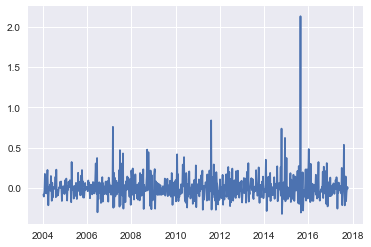

In [22]:
plt.plot(changes['Date'],changes['weekly_change'])

In [27]:
pos=len(changes)
incr=0
changes['incr']=0
for i in range(0,pos):
    if changes['weekly_change'].iloc[i]>0:
        incr=incr+1       
    else:
        incr=0
    changes['incr'].iloc[i]=incr

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
pos=len(changes)
incr=0
decr=0
changes['incr']=0
changes['decr']=0
for i in range(0,pos):
    if changes['weekly_change'].iloc[i]>0:
        incr=incr+1
        decr=0
    else:
        incr=0
        decr=decr+1
    changes['incr'].iloc[i]=incr
    changes['decr'].iloc[i]=decr

        

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
changes

,Date,weekly_change,incr,decr
5,2004-01-09,-0.080681,0,1
10,2004-01-16,-0.104478,0,2
15,2004-01-26,-0.030000,0,3
20,2004-02-02,0.175945,1,0
25,2004-02-09,-0.042081,0,1
30,2004-02-17,-0.060403,0,2
35,2004-02-24,0.032468,1,0
40,2004-03-02,-0.065409,0,1
45,2004-03-09,0.117093,1,0
50,2004-03-16,0.225301,2,0


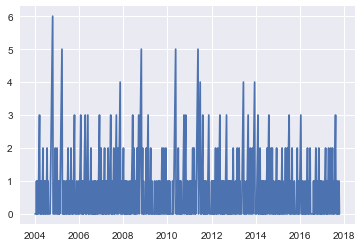

In [29]:
plt.plot(changes['Date'],changes['incr'])

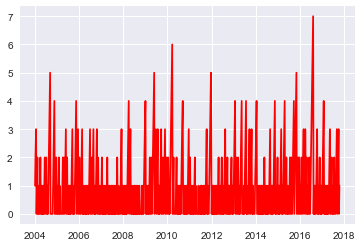

In [31]:
plt.plot(changes['Date'],changes['decr'],color='red')